In [115]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'font.size': 18})
IMAGES_FOLDER_PATH = os.path.join(os.path.dirname(os.path.abspath("main.ipynb")), 'tex/images')

In [116]:
def compute_system_theta(t, default_theta, t_end):
    return default_theta * (1 + (t >= t_end / 3) + (t >= (2 * t_end / 3)))

def u(t, x, theta, g, lambda_):
    return - theta * x - lambda_ * x + lambda_ * g(t)

def adaptive_control(state, t, default_theta, t_end, g, gamma, lambda_):
    x, xm, theta = state

    dx = compute_system_theta(t, default_theta, t_end) * x + u(t, x, theta, g, lambda_)
    dxm = -lambda_ * xm + lambda_ * g(t)
    dtheta = -gamma * x * (xm - x)

    return [dx, dxm, dtheta]

def control(state, t, default_theta, t_end, g, gamma, lambda_):
    x, xm, theta = state

    dx = compute_system_theta(t, default_theta, t_end) * x + u(t, x, default_theta, g, lambda_)
    dxm = -lambda_ * xm + lambda_ * g(t)
    dtheta = -gamma * x * (xm - x)

    return [dx, dxm, dtheta]

In [117]:
def task_1(t, y0, theta, g = lambda t: 3 * np.sin(t), gamma = 0.6, lambda_ = 4):
    p = (theta, t[-1], g, gamma, lambda_)
    result = odeint(control, y0, t, p)

    fig, axs = plt.subplots(1, 2, figsize=(12, 7))
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3,hspace=0.3)

    axs[0].plot(t, result[:, 0], color='b', label='$x$')
    axs[0].plot(t, result[:, 1], color='r', linestyle='--', label='$x_m$')
    axs[0].grid()
    axs[0].set(xlabel='t, с', ylabel='x')
    axs[0].legend()

    axs[1].plot(t, u(t, result[:, 0], theta, g, lambda_), color='r', label='$u$')
    axs[1].grid()
    axs[1].set(xlabel='t, с', ylabel='$u$')
    axs[1].legend()

    plt.savefig(IMAGES_FOLDER_PATH + f'/task_1.png')

In [118]:
def task_2(t, y0, theta, g = lambda t: 3 * np.sin(t), gamma = 0.6, lambda_ = 4):
    p = (theta, t[-1], g, gamma, lambda_)
    result = odeint(adaptive_control, y0, t, p)


    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    # fig.suptitle(f"$\\gamma = {gamma}$")
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3,hspace=0.3)

    axs[0, 0].plot(t, result[:, 0], color='b', label='$x$')
    axs[0, 0].plot(t, result[:, 1], color='r', linestyle='--', label='$x_m$')
    axs[0, 0].grid()
    axs[0, 0].set(xlabel='t, с', ylabel='x')
    axs[0, 0].legend()

    axs[1, 0].plot(t, compute_system_theta(t, theta, t[-1]), color='orange', label='$\\theta$')
    axs[1, 0].plot(t, result[:, 2], color='green', linestyle='--', label='$\\hat{\\theta}$')
    axs[1, 0].grid()
    axs[1, 0].set(xlabel='t, с', ylabel='$\\theta$')
    axs[1, 0].legend()

    axs[0, 1].plot(t, u(t, result[:, 0], result[:, 2], g, lambda_), color='r', label='$u$')
    axs[0, 1].grid()
    axs[0, 1].set(xlabel='t, с', ylabel='$u$')
    axs[0, 1].legend()

    axs[1, 1].plot(t, compute_system_theta(t, theta, t[-1]) - result[:, 2], color='orange', label='$\\tilde{\\theta}$')
    axs[1, 1].grid()
    axs[1, 1].set(xlabel='t, с', ylabel='$\\tilde{\\theta}$')
    axs[1, 1].legend()

    plt.savefig(IMAGES_FOLDER_PATH + f'/task_2_{gamma}.png')
    

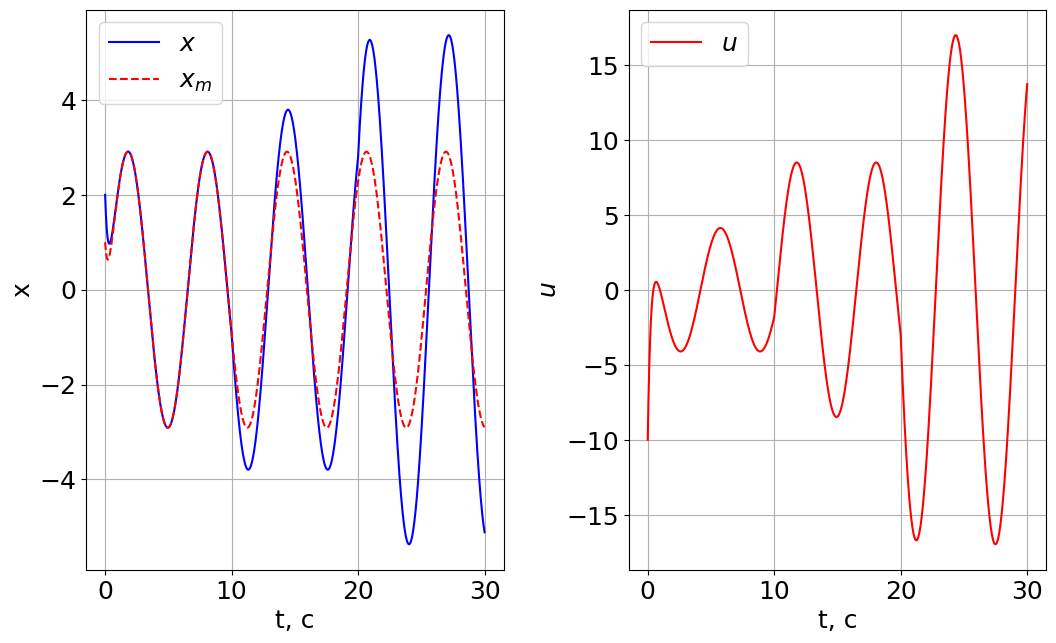

In [119]:
y0 = [2.0, 1.0, 0.0]
t = np.linspace(0.0, 30.0, 1000)
task_1(t, y0, theta = 1.0)

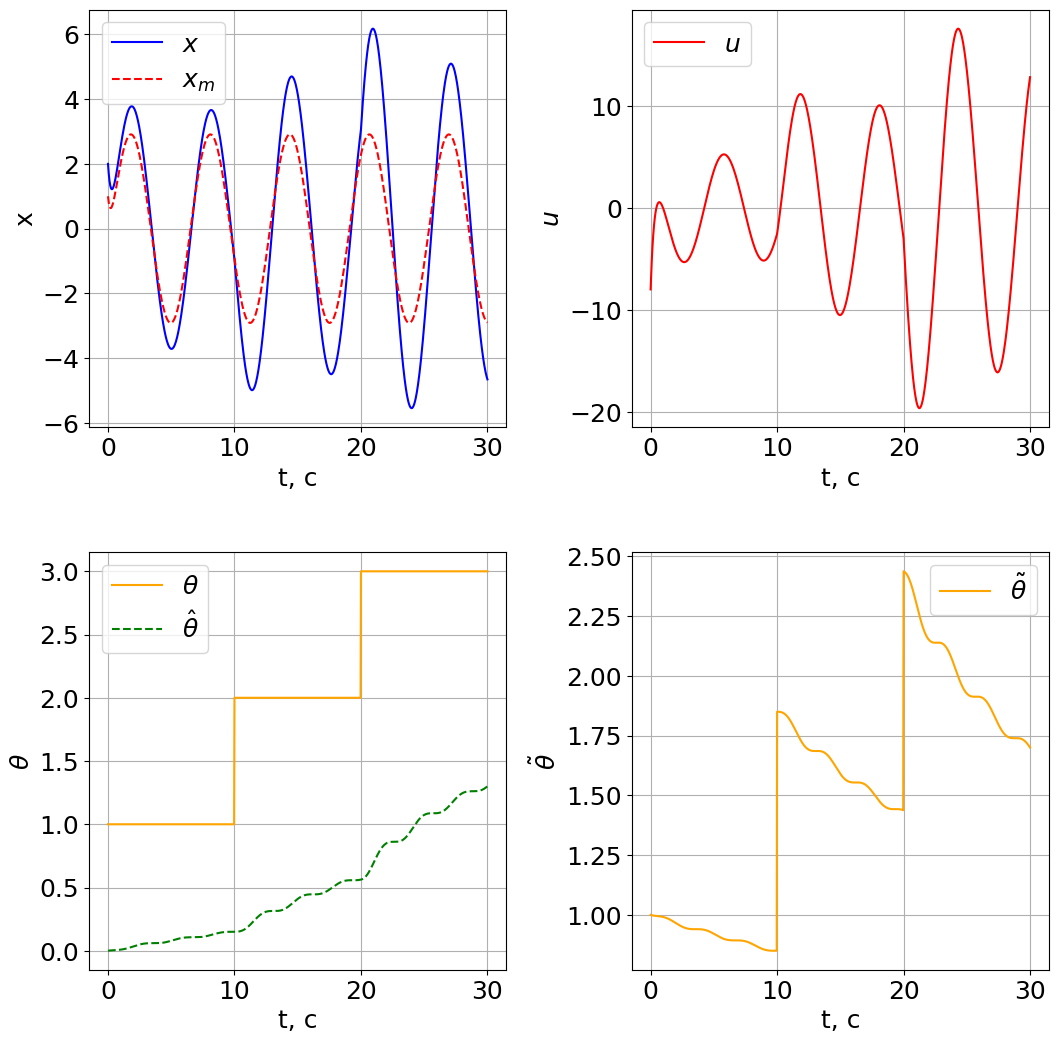

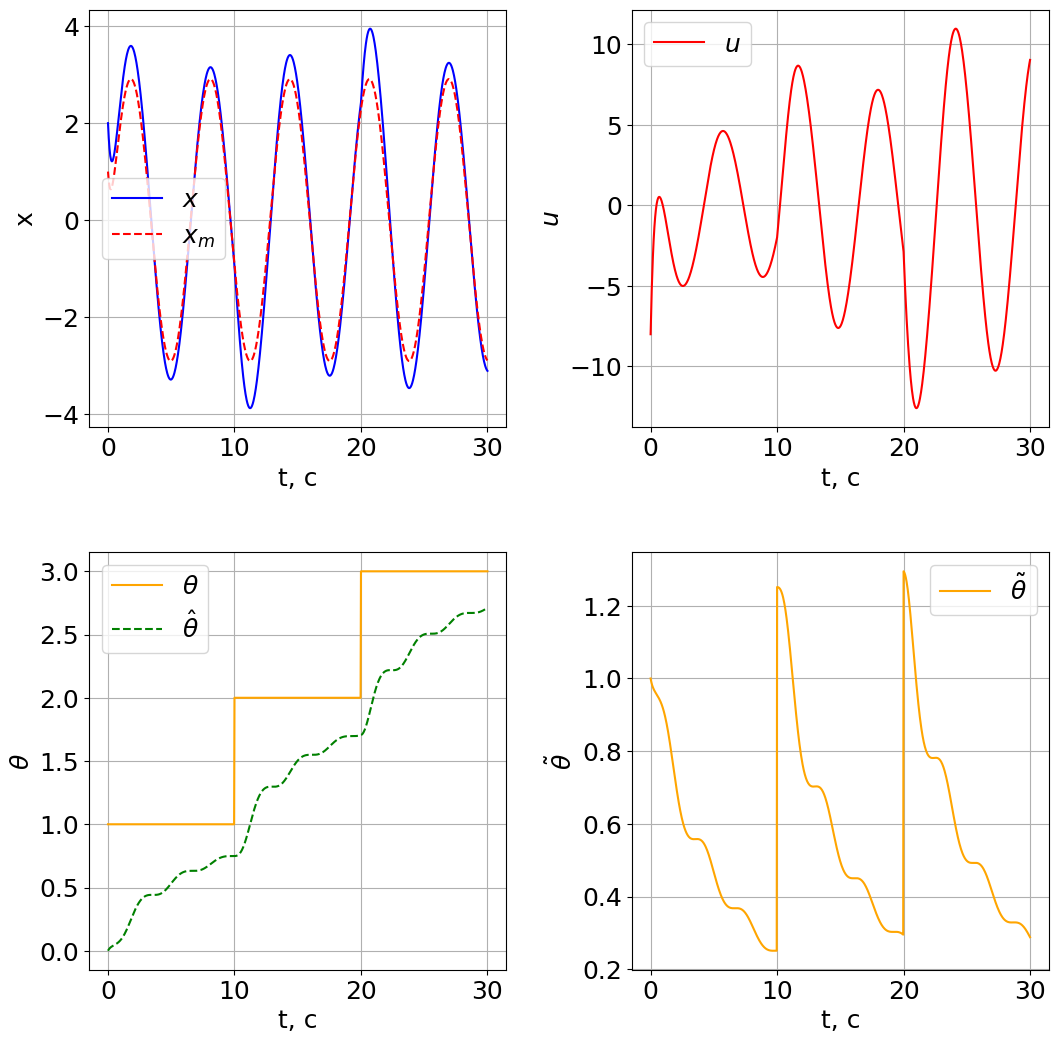

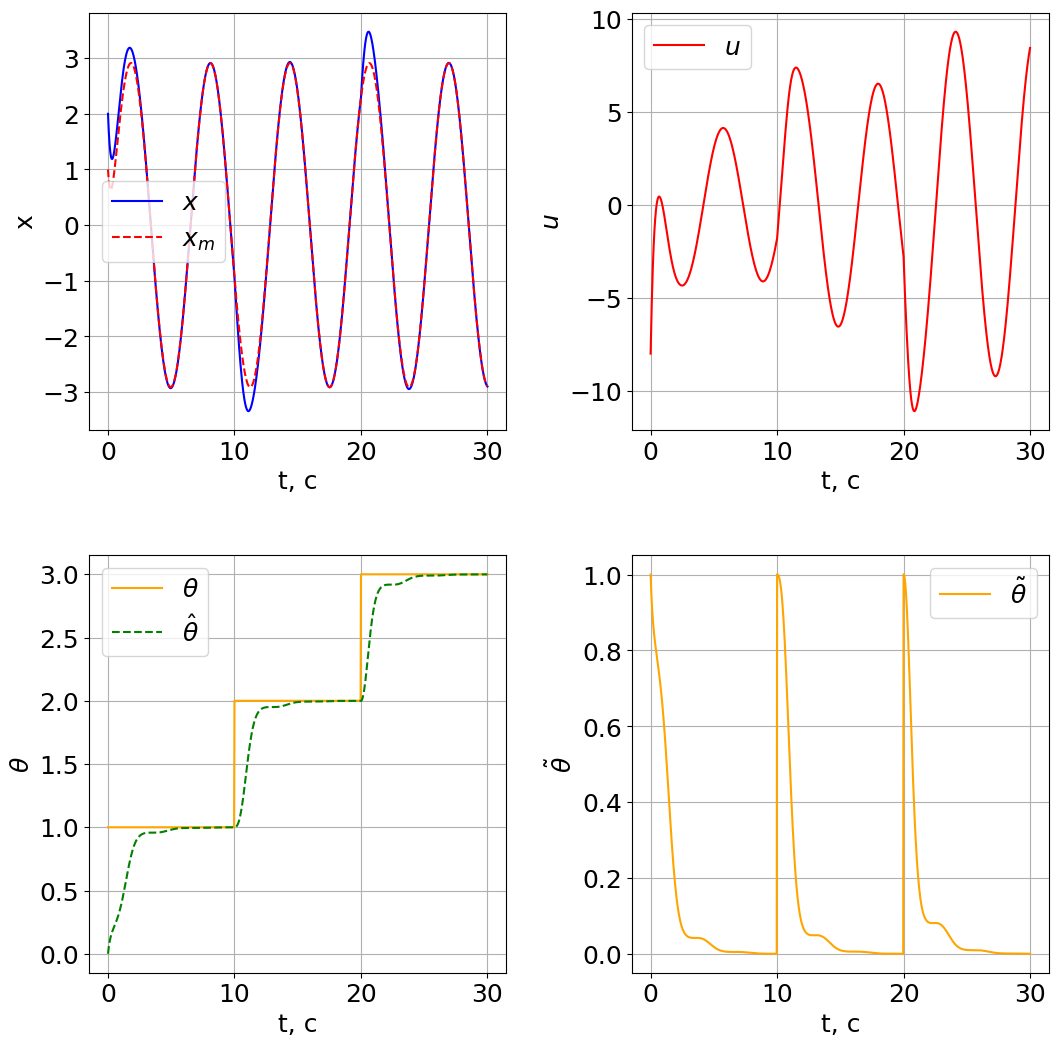

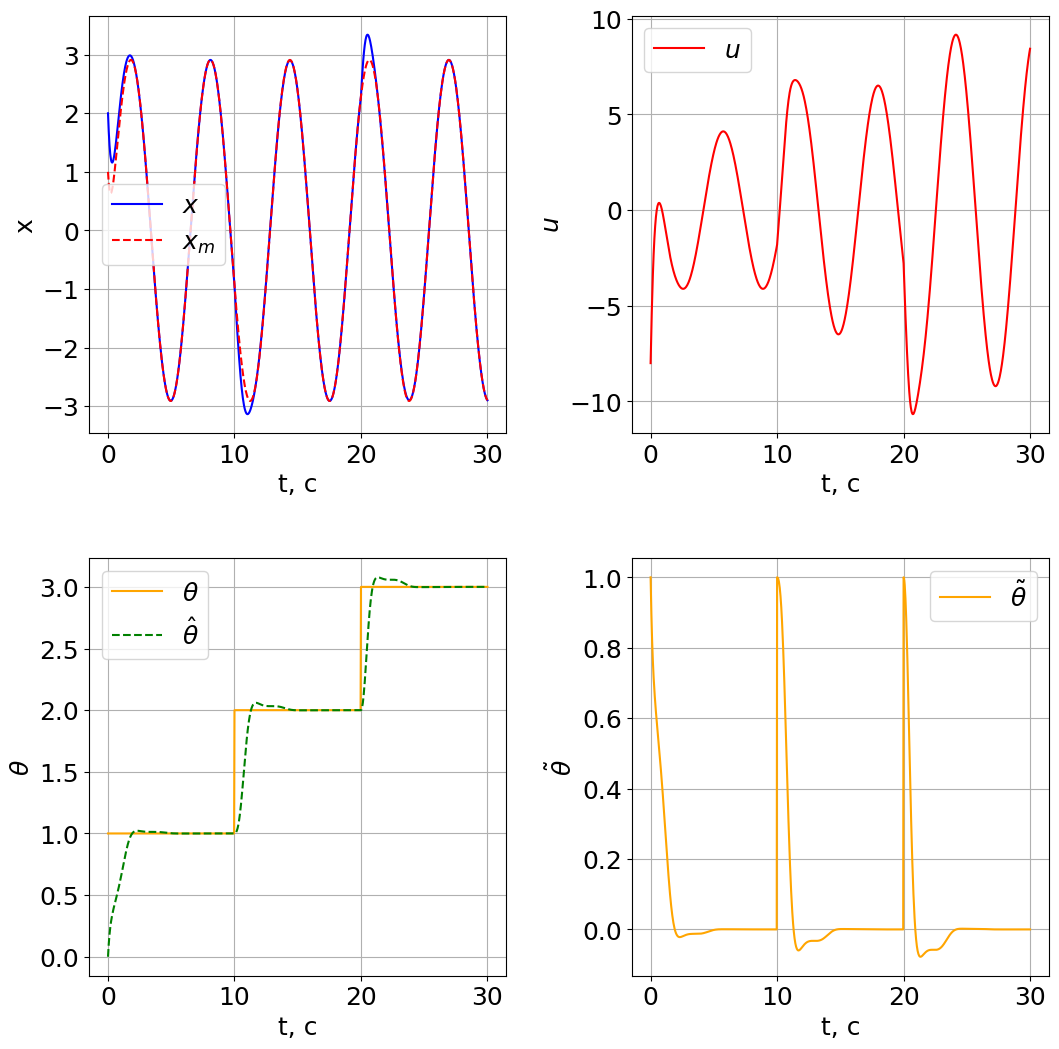

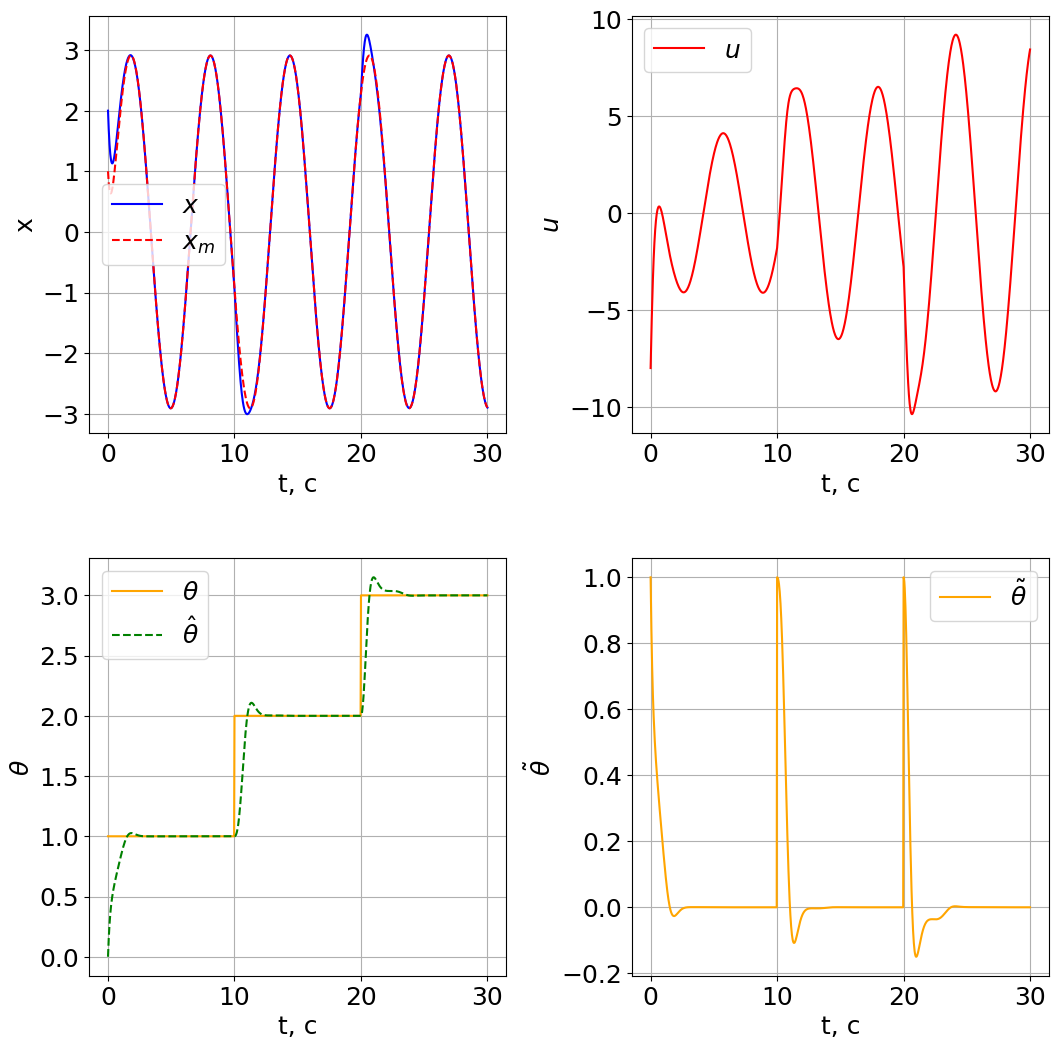

In [120]:
gammas = [0.01, 0.1, 0.5, 1.0, 1.5]
for gamma in gammas:
    task_2(t, y0, theta = 1.0, gamma=gamma)